# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:11<00:00, 5.29KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

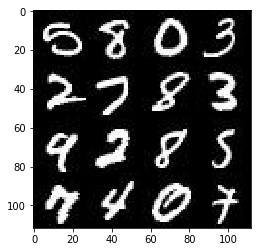

In [3]:
show_n_images = 20

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

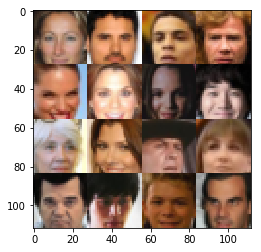

In [5]:
show_n_images = 20

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    learning_rate = tf.placeholder(tf.float32, None, name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        layer_1 = tf.layers.conv2d(images, 32, 5,strides=2, padding='same')
        layer_1 = tf.layers.batch_normalization(layer_1,training=True)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
     
        
    
        layer_2 = tf.layers.conv2d(layer_1, 64, 5, strides=2, padding='same')
        layer_2 = tf.layers.batch_normalization(layer_2, training=True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
  
        
        layer_3 = tf.layers.conv2d(layer_2, 128, 5, strides=2, padding='same')
        layer_3 = tf.layers.batch_normalization(layer_3, training=True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
    
        
        layer_4 = tf.layers.conv2d(layer_3, 256, 5,  strides=2, padding='same')
        layer_4 = tf.layers.batch_normalization(layer_4, training=True)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
     
        
        flattened = tf.reshape(layer_4, (-1, 2*2*256))
        logits = tf.layers.dense(flattened, 1)
        output = tf.sigmoid(logits)
        
        return output, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        
        layer_1 = tf.layers.dense(z, 4 * 4 * 512)
        layer_1 = tf.reshape(layer_1, (-1, 4, 4, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
  
        layer_2 = tf.layers.conv2d_transpose(layer_1, 128, 4, 1, padding='valid') 
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)

        
        layer_3 = tf.layers.conv2d_transpose(layer_2, 64, 5, 2, padding='same') 
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)

        
        layer_4 = tf.layers.conv2d_transpose(layer_3, 32, 5, 2, padding='same')
        layer_4 = tf.layers.batch_normalization(layer_4, training=is_train)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
     
        
        logits = tf.layers.conv2d_transpose(layer_4, out_channel_dim, 3, 1, padding='same')
        output = tf.tanh(logits)
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(gen_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
        return dis_train_ops, gen_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [16]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    dis_loss_train = dis_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    gen_loss_train = gen_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.8543... Generator Loss: 0.9286
Epoch 1/2... Discriminator Loss: 1.9614... Generator Loss: 5.6391
Epoch 1/2... Discriminator Loss: 0.5485... Generator Loss: 3.3464
Epoch 1/2... Discriminator Loss: 0.7771... Generator Loss: 1.8409
Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 1.3090
Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 0.7640
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 1.3124
Epoch 1/2... Discriminator Loss: 0.7377... Generator Loss: 2.7808
Epoch 1/2... Discriminator Loss: 0.7265... Generator Loss: 1.7930
Epoch 1/2... Discriminator Loss: 1.4632... Generator Loss: 0.4852


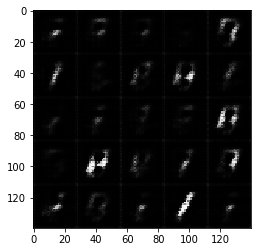

Epoch 1/2... Discriminator Loss: 1.4532... Generator Loss: 0.6181
Epoch 1/2... Discriminator Loss: 0.8809... Generator Loss: 1.1108
Epoch 1/2... Discriminator Loss: 0.5668... Generator Loss: 2.0800
Epoch 1/2... Discriminator Loss: 1.0751... Generator Loss: 1.0244
Epoch 1/2... Discriminator Loss: 0.9604... Generator Loss: 2.6566
Epoch 1/2... Discriminator Loss: 1.0855... Generator Loss: 1.5736
Epoch 1/2... Discriminator Loss: 2.4812... Generator Loss: 0.1873
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 0.9285
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.9834
Epoch 1/2... Discriminator Loss: 0.9790... Generator Loss: 1.0042


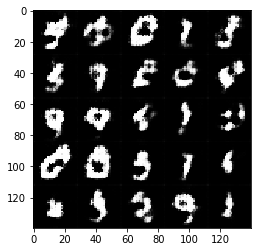

Epoch 1/2... Discriminator Loss: 1.5019... Generator Loss: 0.7128
Epoch 1/2... Discriminator Loss: 0.9459... Generator Loss: 1.6309
Epoch 1/2... Discriminator Loss: 1.4096... Generator Loss: 0.6253
Epoch 1/2... Discriminator Loss: 0.9216... Generator Loss: 1.1524
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 0.9337
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 1.0828
Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 0.9491
Epoch 1/2... Discriminator Loss: 1.1853... Generator Loss: 1.0944
Epoch 1/2... Discriminator Loss: 0.9829... Generator Loss: 1.1863
Epoch 1/2... Discriminator Loss: 1.1615... Generator Loss: 0.9857


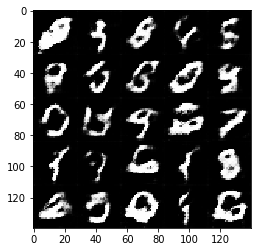

Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 1.0732
Epoch 1/2... Discriminator Loss: 1.2176... Generator Loss: 1.9091
Epoch 1/2... Discriminator Loss: 1.3664... Generator Loss: 1.8544
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 0.9636
Epoch 1/2... Discriminator Loss: 0.9627... Generator Loss: 1.2062
Epoch 1/2... Discriminator Loss: 1.2442... Generator Loss: 1.7586
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.7962
Epoch 1/2... Discriminator Loss: 1.1603... Generator Loss: 0.8927
Epoch 1/2... Discriminator Loss: 1.0741... Generator Loss: 0.9725
Epoch 1/2... Discriminator Loss: 1.0602... Generator Loss: 1.1697


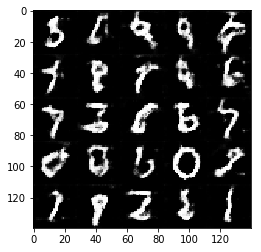

Epoch 1/2... Discriminator Loss: 1.1975... Generator Loss: 0.7508
Epoch 1/2... Discriminator Loss: 1.3606... Generator Loss: 2.1207
Epoch 1/2... Discriminator Loss: 1.0098... Generator Loss: 1.0828
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 0.9268
Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 0.7371
Epoch 1/2... Discriminator Loss: 1.0144... Generator Loss: 1.0193
Epoch 1/2... Discriminator Loss: 1.2433... Generator Loss: 1.0901
Epoch 1/2... Discriminator Loss: 1.1525... Generator Loss: 0.7135
Epoch 1/2... Discriminator Loss: 1.3510... Generator Loss: 0.6652
Epoch 1/2... Discriminator Loss: 1.1287... Generator Loss: 0.9606


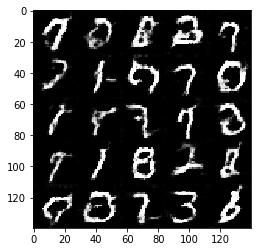

Epoch 1/2... Discriminator Loss: 1.0854... Generator Loss: 1.0718
Epoch 1/2... Discriminator Loss: 1.1855... Generator Loss: 1.0707
Epoch 1/2... Discriminator Loss: 1.3935... Generator Loss: 0.5282
Epoch 1/2... Discriminator Loss: 0.9240... Generator Loss: 1.3162
Epoch 1/2... Discriminator Loss: 1.2858... Generator Loss: 2.0738
Epoch 1/2... Discriminator Loss: 1.0377... Generator Loss: 0.8059
Epoch 1/2... Discriminator Loss: 1.5159... Generator Loss: 0.9675
Epoch 1/2... Discriminator Loss: 1.2336... Generator Loss: 0.9668
Epoch 1/2... Discriminator Loss: 0.9210... Generator Loss: 1.0973
Epoch 1/2... Discriminator Loss: 1.1575... Generator Loss: 0.7335


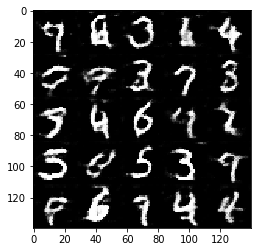

Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 0.9262
Epoch 1/2... Discriminator Loss: 0.9802... Generator Loss: 1.2014
Epoch 1/2... Discriminator Loss: 1.0022... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.0791... Generator Loss: 0.8614
Epoch 1/2... Discriminator Loss: 1.1910... Generator Loss: 1.1778
Epoch 1/2... Discriminator Loss: 1.1499... Generator Loss: 0.8078
Epoch 1/2... Discriminator Loss: 1.1931... Generator Loss: 0.6533
Epoch 1/2... Discriminator Loss: 1.2274... Generator Loss: 0.7053
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 1.1754
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 1.6008


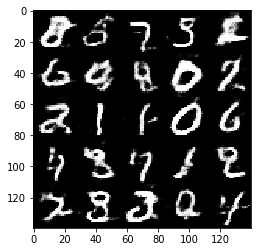

Epoch 1/2... Discriminator Loss: 0.9881... Generator Loss: 1.0945
Epoch 1/2... Discriminator Loss: 1.1733... Generator Loss: 0.7004
Epoch 1/2... Discriminator Loss: 1.0308... Generator Loss: 0.8634
Epoch 1/2... Discriminator Loss: 1.2169... Generator Loss: 0.9817
Epoch 1/2... Discriminator Loss: 1.0906... Generator Loss: 1.5573
Epoch 1/2... Discriminator Loss: 1.2070... Generator Loss: 0.8278
Epoch 1/2... Discriminator Loss: 1.2019... Generator Loss: 0.7038
Epoch 1/2... Discriminator Loss: 1.0718... Generator Loss: 0.9026
Epoch 1/2... Discriminator Loss: 1.3601... Generator Loss: 0.5407
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 1.2695


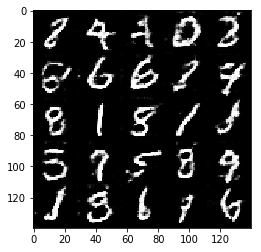

Epoch 1/2... Discriminator Loss: 1.0903... Generator Loss: 1.2609
Epoch 1/2... Discriminator Loss: 1.1377... Generator Loss: 1.2472
Epoch 1/2... Discriminator Loss: 1.2815... Generator Loss: 0.6343
Epoch 1/2... Discriminator Loss: 1.2152... Generator Loss: 0.5976
Epoch 1/2... Discriminator Loss: 1.8281... Generator Loss: 0.3698
Epoch 1/2... Discriminator Loss: 1.2432... Generator Loss: 0.6230
Epoch 1/2... Discriminator Loss: 1.3740... Generator Loss: 0.5238
Epoch 1/2... Discriminator Loss: 1.4421... Generator Loss: 0.4924
Epoch 1/2... Discriminator Loss: 0.9365... Generator Loss: 1.6420
Epoch 1/2... Discriminator Loss: 0.8019... Generator Loss: 1.4578


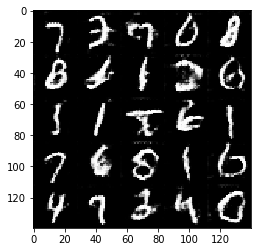

Epoch 1/2... Discriminator Loss: 1.3788... Generator Loss: 0.5378
Epoch 1/2... Discriminator Loss: 1.5774... Generator Loss: 0.3945
Epoch 1/2... Discriminator Loss: 0.9268... Generator Loss: 1.0318
Epoch 2/2... Discriminator Loss: 1.5840... Generator Loss: 0.5146
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 1.1614
Epoch 2/2... Discriminator Loss: 1.1193... Generator Loss: 0.8114
Epoch 2/2... Discriminator Loss: 1.0889... Generator Loss: 0.7148
Epoch 2/2... Discriminator Loss: 1.3018... Generator Loss: 0.7586
Epoch 2/2... Discriminator Loss: 1.2415... Generator Loss: 1.5409
Epoch 2/2... Discriminator Loss: 1.3458... Generator Loss: 1.8721


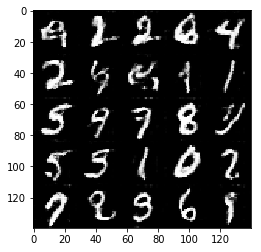

Epoch 2/2... Discriminator Loss: 1.1065... Generator Loss: 0.8141
Epoch 2/2... Discriminator Loss: 2.1216... Generator Loss: 0.2138
Epoch 2/2... Discriminator Loss: 0.7863... Generator Loss: 1.1685
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 0.8008
Epoch 2/2... Discriminator Loss: 1.0355... Generator Loss: 0.7978
Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 0.7150
Epoch 2/2... Discriminator Loss: 1.4790... Generator Loss: 2.4225
Epoch 2/2... Discriminator Loss: 1.1201... Generator Loss: 0.8392
Epoch 2/2... Discriminator Loss: 1.2744... Generator Loss: 0.6743
Epoch 2/2... Discriminator Loss: 1.0663... Generator Loss: 1.4598


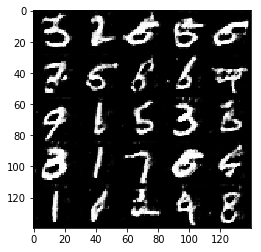

Epoch 2/2... Discriminator Loss: 1.4621... Generator Loss: 0.4875
Epoch 2/2... Discriminator Loss: 1.6399... Generator Loss: 0.3901
Epoch 2/2... Discriminator Loss: 1.1040... Generator Loss: 0.7723
Epoch 2/2... Discriminator Loss: 1.1436... Generator Loss: 1.0617
Epoch 2/2... Discriminator Loss: 1.1609... Generator Loss: 0.9807
Epoch 2/2... Discriminator Loss: 1.5163... Generator Loss: 0.4782
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 0.7608
Epoch 2/2... Discriminator Loss: 1.4864... Generator Loss: 0.4566
Epoch 2/2... Discriminator Loss: 1.0840... Generator Loss: 0.7677
Epoch 2/2... Discriminator Loss: 1.6701... Generator Loss: 0.3691


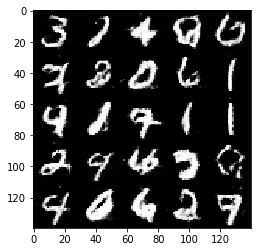

Epoch 2/2... Discriminator Loss: 1.1361... Generator Loss: 1.4696
Epoch 2/2... Discriminator Loss: 1.0993... Generator Loss: 0.7482
Epoch 2/2... Discriminator Loss: 1.2597... Generator Loss: 0.8835
Epoch 2/2... Discriminator Loss: 0.9425... Generator Loss: 0.9868
Epoch 2/2... Discriminator Loss: 1.1069... Generator Loss: 0.6952
Epoch 2/2... Discriminator Loss: 1.0463... Generator Loss: 0.9765
Epoch 2/2... Discriminator Loss: 0.9641... Generator Loss: 1.0323
Epoch 2/2... Discriminator Loss: 1.4706... Generator Loss: 0.4926
Epoch 2/2... Discriminator Loss: 0.9963... Generator Loss: 0.8691
Epoch 2/2... Discriminator Loss: 1.8110... Generator Loss: 0.3414


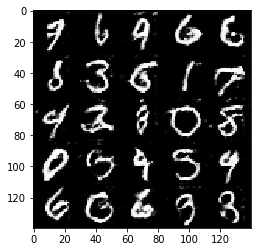

Epoch 2/2... Discriminator Loss: 1.1506... Generator Loss: 0.6956
Epoch 2/2... Discriminator Loss: 1.2835... Generator Loss: 0.6226
Epoch 2/2... Discriminator Loss: 1.2510... Generator Loss: 1.0767
Epoch 2/2... Discriminator Loss: 1.4854... Generator Loss: 0.4726
Epoch 2/2... Discriminator Loss: 0.8649... Generator Loss: 1.0078
Epoch 2/2... Discriminator Loss: 0.8495... Generator Loss: 1.2074
Epoch 2/2... Discriminator Loss: 1.2611... Generator Loss: 1.7834
Epoch 2/2... Discriminator Loss: 1.0712... Generator Loss: 1.7285
Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.1268
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 1.2204


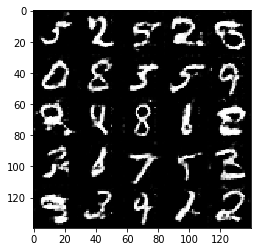

Epoch 2/2... Discriminator Loss: 1.0686... Generator Loss: 1.1489
Epoch 2/2... Discriminator Loss: 1.1086... Generator Loss: 0.7027
Epoch 2/2... Discriminator Loss: 1.0923... Generator Loss: 0.7797
Epoch 2/2... Discriminator Loss: 0.8250... Generator Loss: 1.9853
Epoch 2/2... Discriminator Loss: 1.4652... Generator Loss: 0.4586
Epoch 2/2... Discriminator Loss: 0.9969... Generator Loss: 0.9475
Epoch 2/2... Discriminator Loss: 0.9058... Generator Loss: 1.0105
Epoch 2/2... Discriminator Loss: 1.5607... Generator Loss: 0.3846
Epoch 2/2... Discriminator Loss: 2.2600... Generator Loss: 0.2076
Epoch 2/2... Discriminator Loss: 0.9795... Generator Loss: 1.2394


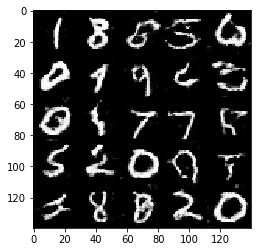

Epoch 2/2... Discriminator Loss: 0.9365... Generator Loss: 1.3042
Epoch 2/2... Discriminator Loss: 1.1366... Generator Loss: 0.8611
Epoch 2/2... Discriminator Loss: 1.0873... Generator Loss: 0.7448
Epoch 2/2... Discriminator Loss: 1.1823... Generator Loss: 0.6803
Epoch 2/2... Discriminator Loss: 1.5765... Generator Loss: 0.3806
Epoch 2/2... Discriminator Loss: 0.7391... Generator Loss: 1.4822
Epoch 2/2... Discriminator Loss: 0.9926... Generator Loss: 1.3753
Epoch 2/2... Discriminator Loss: 1.7956... Generator Loss: 0.3768
Epoch 2/2... Discriminator Loss: 0.9658... Generator Loss: 1.0249
Epoch 2/2... Discriminator Loss: 1.9833... Generator Loss: 0.2533


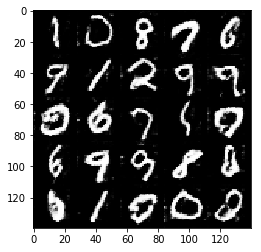

Epoch 2/2... Discriminator Loss: 0.8131... Generator Loss: 1.2127
Epoch 2/2... Discriminator Loss: 1.4918... Generator Loss: 0.4576
Epoch 2/2... Discriminator Loss: 2.7493... Generator Loss: 0.1324
Epoch 2/2... Discriminator Loss: 1.2434... Generator Loss: 1.4293
Epoch 2/2... Discriminator Loss: 1.0126... Generator Loss: 1.4095
Epoch 2/2... Discriminator Loss: 1.5354... Generator Loss: 0.4587
Epoch 2/2... Discriminator Loss: 1.4080... Generator Loss: 0.5386
Epoch 2/2... Discriminator Loss: 0.8226... Generator Loss: 1.3176
Epoch 2/2... Discriminator Loss: 1.1416... Generator Loss: 0.6878
Epoch 2/2... Discriminator Loss: 1.1596... Generator Loss: 1.4555


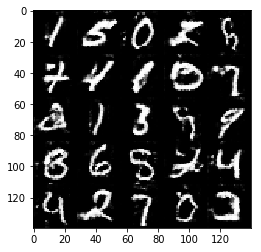

Epoch 2/2... Discriminator Loss: 0.9230... Generator Loss: 1.0311
Epoch 2/2... Discriminator Loss: 0.9076... Generator Loss: 0.9217
Epoch 2/2... Discriminator Loss: 1.0397... Generator Loss: 0.7827
Epoch 2/2... Discriminator Loss: 0.9873... Generator Loss: 1.1095
Epoch 2/2... Discriminator Loss: 0.8394... Generator Loss: 1.2579
Epoch 2/2... Discriminator Loss: 0.8423... Generator Loss: 1.1240
Epoch 2/2... Discriminator Loss: 1.5262... Generator Loss: 0.4084
Epoch 2/2... Discriminator Loss: 0.6653... Generator Loss: 1.7081
Epoch 2/2... Discriminator Loss: 0.9530... Generator Loss: 0.8852
Epoch 2/2... Discriminator Loss: 0.8354... Generator Loss: 1.9902


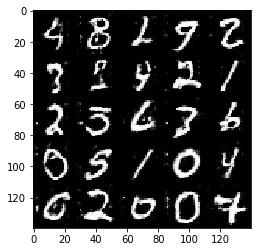

Epoch 2/2... Discriminator Loss: 0.7194... Generator Loss: 1.4174
Epoch 2/2... Discriminator Loss: 0.9386... Generator Loss: 1.0010
Epoch 2/2... Discriminator Loss: 2.2658... Generator Loss: 3.9444
Epoch 2/2... Discriminator Loss: 0.7861... Generator Loss: 1.3784
Epoch 2/2... Discriminator Loss: 0.5745... Generator Loss: 2.2976
Epoch 2/2... Discriminator Loss: 1.0380... Generator Loss: 0.7827
Epoch 2/2... Discriminator Loss: 0.7318... Generator Loss: 1.3792


In [17]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 4.0934
Epoch 1/1... Discriminator Loss: 2.8409... Generator Loss: 0.0882
Epoch 1/1... Discriminator Loss: 1.7251... Generator Loss: 0.2952
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 2.7397
Epoch 1/1... Discriminator Loss: 0.6966... Generator Loss: 2.3571
Epoch 1/1... Discriminator Loss: 0.5937... Generator Loss: 1.9936
Epoch 1/1... Discriminator Loss: 2.0087... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 1.6590... Generator Loss: 0.3754
Epoch 1/1... Discriminator Loss: 0.9035... Generator Loss: 1.1307
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.6959


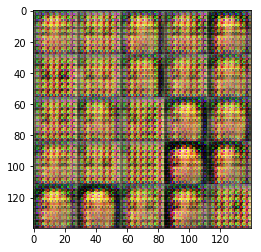

Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.4886
Epoch 1/1... Discriminator Loss: 2.8890... Generator Loss: 0.1197
Epoch 1/1... Discriminator Loss: 0.7709... Generator Loss: 1.1220
Epoch 1/1... Discriminator Loss: 0.8445... Generator Loss: 1.9069
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 1.2385
Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 1.4715
Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 0.8018
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 1.1285
Epoch 1/1... Discriminator Loss: 0.9113... Generator Loss: 1.2532


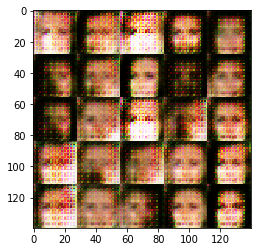

Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 1.5460... Generator Loss: 0.5506
Epoch 1/1... Discriminator Loss: 0.8309... Generator Loss: 1.4568
Epoch 1/1... Discriminator Loss: 1.1228... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.5584
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.1075
Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.0925... Generator Loss: 1.2548


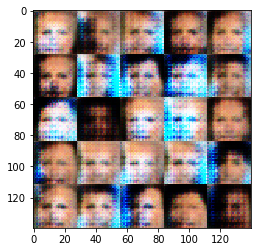

Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 0.9830... Generator Loss: 1.2139
Epoch 1/1... Discriminator Loss: 2.0385... Generator Loss: 0.2448
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.9447
Epoch 1/1... Discriminator Loss: 1.1677... Generator Loss: 2.2449
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 1.8982
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.9746
Epoch 1/1... Discriminator Loss: 1.4178... Generator Loss: 2.1848


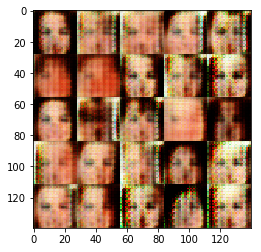

Epoch 1/1... Discriminator Loss: 1.2971... Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 0.7132... Generator Loss: 1.3340
Epoch 1/1... Discriminator Loss: 1.8775... Generator Loss: 3.3506
Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 1.8627
Epoch 1/1... Discriminator Loss: 0.9490... Generator Loss: 1.0132
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.4760
Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 1.0751


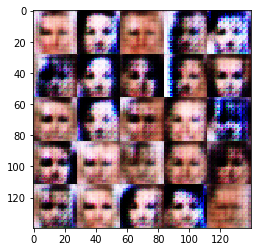

Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.2328
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 1.8840
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.5124
Epoch 1/1... Discriminator Loss: 1.4904... Generator Loss: 2.8380
Epoch 1/1... Discriminator Loss: 0.8414... Generator Loss: 1.7400
Epoch 1/1... Discriminator Loss: 0.8086... Generator Loss: 1.1690
Epoch 1/1... Discriminator Loss: 1.0676... Generator Loss: 2.3240
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.9620... Generator Loss: 0.2616


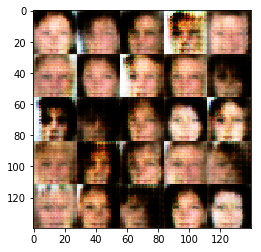

Epoch 1/1... Discriminator Loss: 1.1262... Generator Loss: 0.8460
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.9644
Epoch 1/1... Discriminator Loss: 0.9190... Generator Loss: 1.4906
Epoch 1/1... Discriminator Loss: 0.7964... Generator Loss: 1.5177
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.5234
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 2.5755
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 2.0459... Generator Loss: 0.2663
Epoch 1/1... Discriminator Loss: 1.1726... Generator Loss: 1.0079
Epoch 1/1... Discriminator Loss: 1.2848... Generator Loss: 0.6545


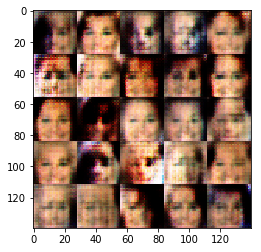

Epoch 1/1... Discriminator Loss: 2.2186... Generator Loss: 0.1955
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 0.9303
Epoch 1/1... Discriminator Loss: 1.6796... Generator Loss: 2.5844
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 1.5798
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 1.1425
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.8658
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.8637
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.2001... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 1.7596


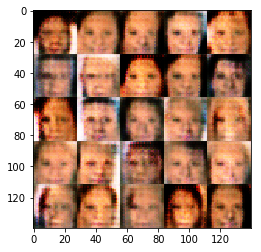

Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 2.1746
Epoch 1/1... Discriminator Loss: 0.8737... Generator Loss: 1.4494
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 1.1846... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 1.2330
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 0.8980... Generator Loss: 1.0924
Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 0.6435
Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.5531


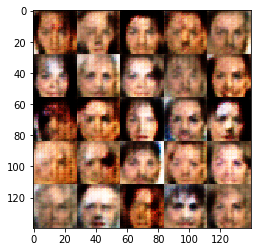

Epoch 1/1... Discriminator Loss: 1.0854... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.8405
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 0.9024... Generator Loss: 1.2465
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 0.9477
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 1.2099
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 2.3055
Epoch 1/1... Discriminator Loss: 1.9230... Generator Loss: 0.2774


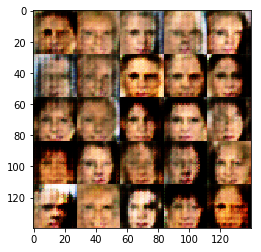

Epoch 1/1... Discriminator Loss: 1.1270... Generator Loss: 1.0475
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 2.1086
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 2.1019
Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 0.8344
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.4504
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 2.3219
Epoch 1/1... Discriminator Loss: 1.7834... Generator Loss: 0.3461
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.6867


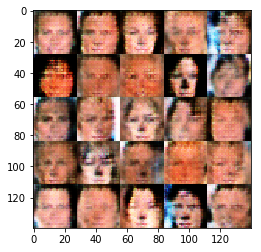

Epoch 1/1... Discriminator Loss: 1.0445... Generator Loss: 1.2200
Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 1.1345
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 0.9590
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.1650
Epoch 1/1... Discriminator Loss: 0.9729... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 0.9915... Generator Loss: 1.3806
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 2.1748
Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 0.9062


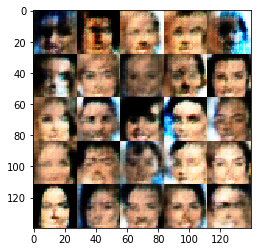

Epoch 1/1... Discriminator Loss: 1.0140... Generator Loss: 2.0368
Epoch 1/1... Discriminator Loss: 1.7681... Generator Loss: 2.3738
Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 1.6667... Generator Loss: 0.3700
Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 1.4788
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.5267
Epoch 1/1... Discriminator Loss: 0.9624... Generator Loss: 1.1162
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 1.4562


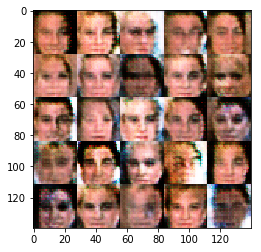

Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 0.9348... Generator Loss: 1.3529
Epoch 1/1... Discriminator Loss: 1.7280... Generator Loss: 2.7818
Epoch 1/1... Discriminator Loss: 0.9142... Generator Loss: 1.2248
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.7072
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.0478
Epoch 1/1... Discriminator Loss: 0.8989... Generator Loss: 1.7751
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 2.0680
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.6657


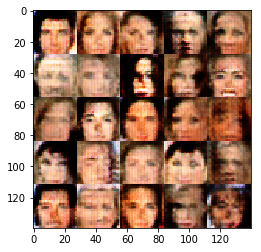

Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 2.2479
Epoch 1/1... Discriminator Loss: 1.9289... Generator Loss: 0.2804
Epoch 1/1... Discriminator Loss: 1.5577... Generator Loss: 0.4749
Epoch 1/1... Discriminator Loss: 1.2401... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 1.6471
Epoch 1/1... Discriminator Loss: 1.1910... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 1.0501... Generator Loss: 1.1317
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 1.5855
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.0754... Generator Loss: 0.8472


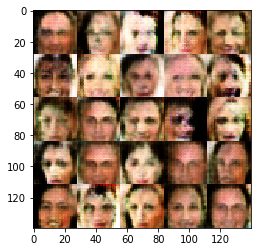

Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 1.0513
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 0.9212... Generator Loss: 1.2415
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 0.9779
Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.0908
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 2.1404
Epoch 1/1... Discriminator Loss: 1.1872... Generator Loss: 1.0682
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.9530... Generator Loss: 0.2701


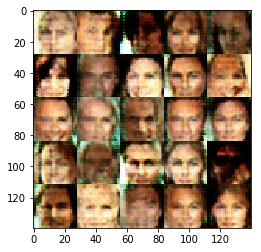

Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.4375
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.7717
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 1.3112
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.5642
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 0.9210
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 2.1597


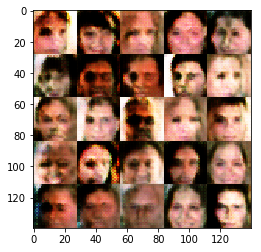

Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 0.9846
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.2245... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.0214... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 1.1705
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 1.4957
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 0.8998
Epoch 1/1... Discriminator Loss: 0.9406... Generator Loss: 1.1413
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 1.0720


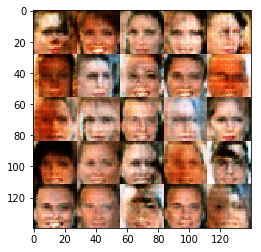

Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 0.8363
Epoch 1/1... Discriminator Loss: 0.9847... Generator Loss: 1.2373
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.0933
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.5523
Epoch 1/1... Discriminator Loss: 1.1245... Generator Loss: 1.7595
Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 1.3002
Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 1.1044


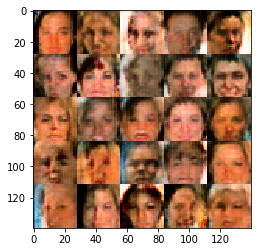

Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 1.4222
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.3650
Epoch 1/1... Discriminator Loss: 0.9121... Generator Loss: 1.4919
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 0.9185
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 1.0949
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 1.7646
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.7497... Generator Loss: 0.3269
Epoch 1/1... Discriminator Loss: 1.0185... Generator Loss: 1.6829


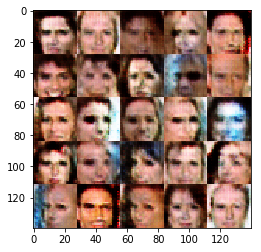

Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 0.7673
Epoch 1/1... Discriminator Loss: 1.5110... Generator Loss: 0.4461
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 2.2002
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.6040
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 2.2930
Epoch 1/1... Discriminator Loss: 1.0626... Generator Loss: 1.1413
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.1412... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 1.7209


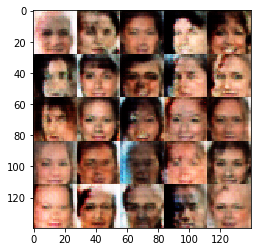

Epoch 1/1... Discriminator Loss: 1.0969... Generator Loss: 1.5423
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.5323
Epoch 1/1... Discriminator Loss: 0.9222... Generator Loss: 1.3738
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.0032
Epoch 1/1... Discriminator Loss: 1.0913... Generator Loss: 1.1793
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 0.8969
Epoch 1/1... Discriminator Loss: 1.0595... Generator Loss: 1.5417
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.8508
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 0.9526


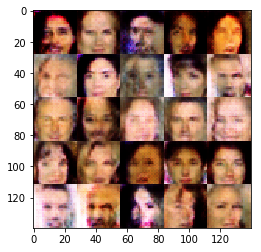

Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 1.0397
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.2144
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 1.4038
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 0.8679
Epoch 1/1... Discriminator Loss: 1.6586... Generator Loss: 0.3970
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 1.0121
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.0221... Generator Loss: 1.2104


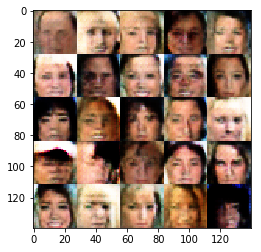

Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.4449
Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.4728
Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 1.1739
Epoch 1/1... Discriminator Loss: 1.0372... Generator Loss: 1.5071
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.0103... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.0576... Generator Loss: 1.0350


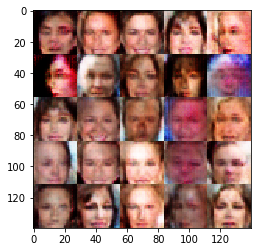

Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 1.0858
Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.0431... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 0.8340
Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 1.6226
Epoch 1/1... Discriminator Loss: 0.9720... Generator Loss: 1.3549
Epoch 1/1... Discriminator Loss: 1.1900... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 2.0819
Epoch 1/1... Discriminator Loss: 1.1588... Generator Loss: 0.8044


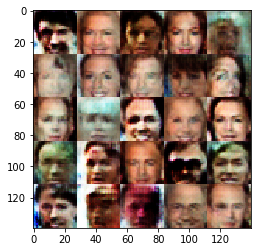

Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 1.5502
Epoch 1/1... Discriminator Loss: 1.1880... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.6956... Generator Loss: 0.3498
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 1.0449
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 1.7864
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 1.0068
Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.6086


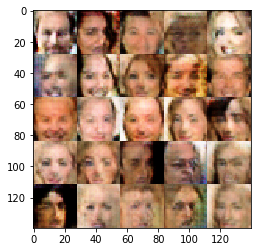

Epoch 1/1... Discriminator Loss: 1.1468... Generator Loss: 1.6055
Epoch 1/1... Discriminator Loss: 1.1319... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 1.2690
Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 0.8453


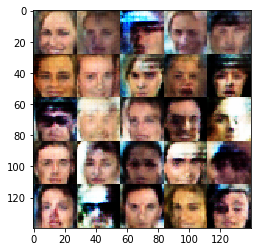

Epoch 1/1... Discriminator Loss: 1.1023... Generator Loss: 1.3414
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 0.9710
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 1.1064
Epoch 1/1... Discriminator Loss: 1.5914... Generator Loss: 0.4258
Epoch 1/1... Discriminator Loss: 1.0640... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 1.0825
Epoch 1/1... Discriminator Loss: 1.2128... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.1608... Generator Loss: 1.2365


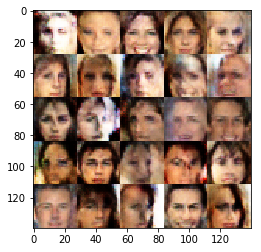

Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 1.1278
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 1.1531... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.7929
Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 1.1566
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 1.1003
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.8309
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 0.7282


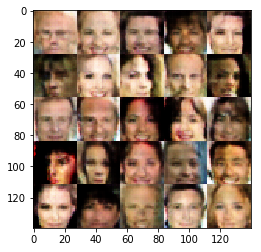

Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 0.8366
Epoch 1/1... Discriminator Loss: 1.1721... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 0.6119
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.6492
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 1.1618
Epoch 1/1... Discriminator Loss: 1.0444... Generator Loss: 1.5038
Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.9620
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.7460


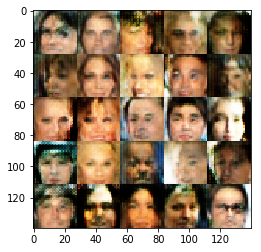

Epoch 1/1... Discriminator Loss: 1.0434... Generator Loss: 1.2993
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 1.0622
Epoch 1/1... Discriminator Loss: 1.5694... Generator Loss: 0.4048
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.5337
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 1.6362
Epoch 1/1... Discriminator Loss: 1.5831... Generator Loss: 0.4309
Epoch 1/1... Discriminator Loss: 1.0622... Generator Loss: 1.1857


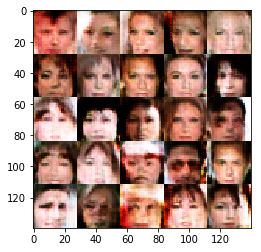

Epoch 1/1... Discriminator Loss: 1.1102... Generator Loss: 0.9101
Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 0.8106
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.6110
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 1.1381
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 1.4810


In [18]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.